In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('AirPassengers.csv')

In [12]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Load and Prepare the Data

In [34]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("AirPassengers.csv")

# Rename Column to fit prophet's expected format
df = df.rename(columns={'Month': 'ds', '#Passengers': 'y'})
df['ds']= pd.to_datetime(df['ds'])



#### Split into Training and Testing Sets

In [38]:
# 80% training, 20% testing
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test= df.iloc[split_index:]


#### Train the Prophet Model

In [39]:
# Initialize and Fit the model
model = Prophet()
model.fit(train)

14:11:30 - cmdstanpy - INFO - Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing


#### Forecast into the future

In [40]:
# Create future dataframe to cover test period
future=model.make_future_dataframe(periods=len(test), freq='MS')
forecast=model.predict(future)

#### Visualize the forecast

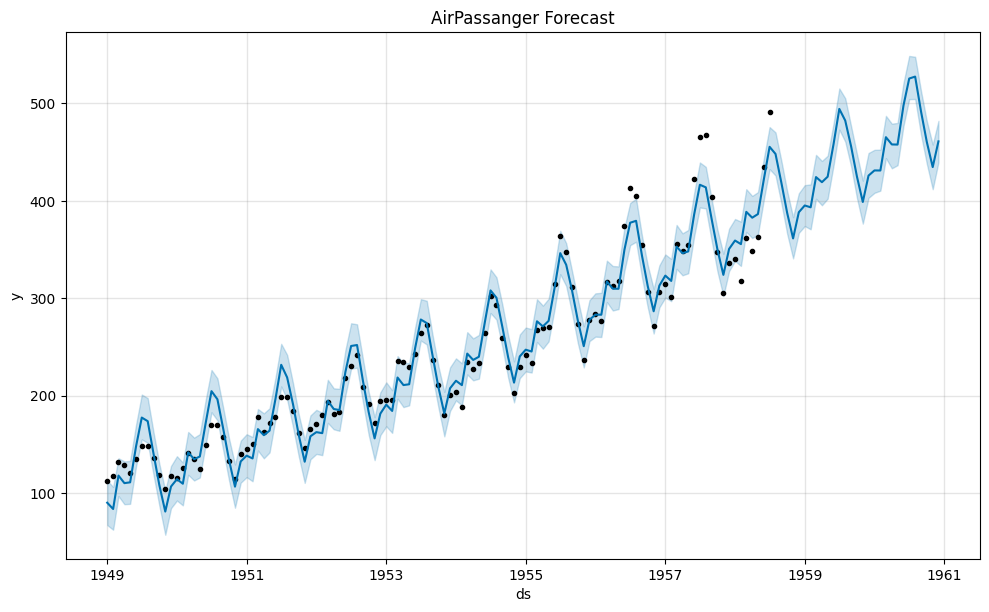

In [41]:
model.plot(forecast)
plt.title('AirPassanger Forecast')
plt.show()

#### Evaluating the model

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract forecast for the test period
forecast_test= forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)

# Compare predicted Vs Actual
actual= test.reset_index(drop=True)
mae= mean_absolute_error(actual['y'], forecast_test['yhat'])
rmse=np.sqrt(mean_squared_error(actual['y'], forecast_test['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 33.90
RMSE: 41.33


#### Extend the forecast by 12 months period

In [58]:
# Initialize and Fit the model
model2 = Prophet()
model2.fit(df)

15:20:46 - cmdstanpy - INFO - Chain [1] start processing
15:20:47 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# Extend forecast by 5 months
future_extended = model2.make_future_dataframe(periods=12, freq='MS')
forecast_extended = model2.predict(future_extended)

In [73]:
future_extended

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01


#### Append forecast to original data

In [74]:
# Extract the last 5 predicted records
future_5= forecast_extended[['ds', 'yhat']].iloc[-5:].copy()
future_5.rename(columns={'yhat':'y'}, inplace=True)
future_5['type']='Forecast'

# Make original data
original=df.copy()
original['type']='Actual'

# Combine the datasets
combined=pd.concat([original, future_5])

#### plot it all together

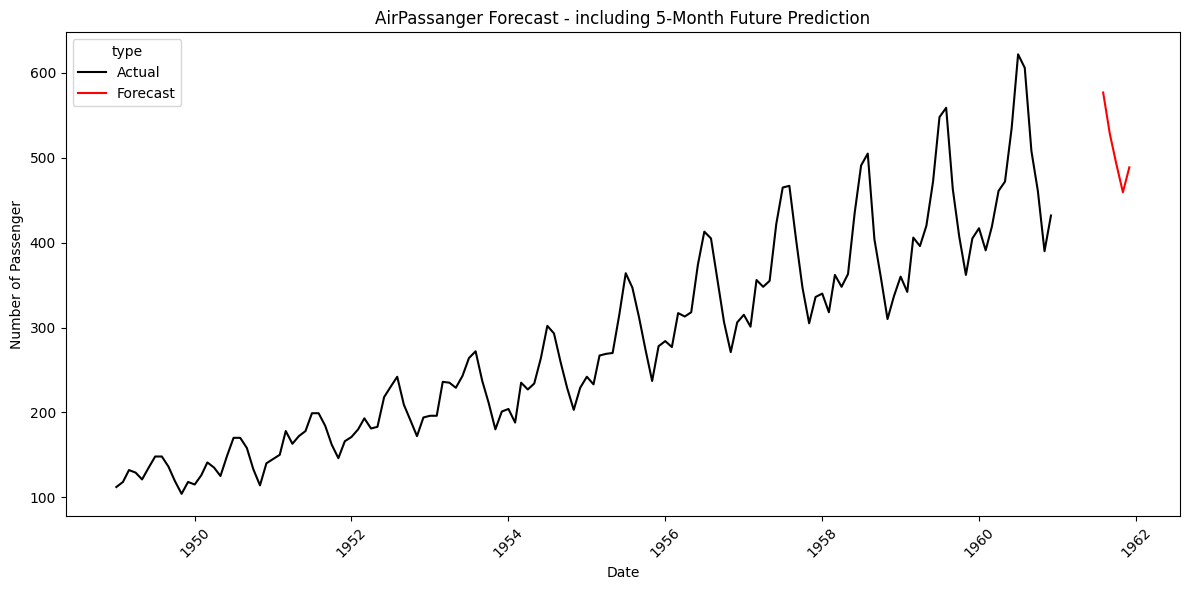

In [75]:
import seaborn as sns

# plot actual vs forecasting including the 5 new prediction
plt.figure(figsize=(12,6))
sns.lineplot(data=combined,x='ds', y='y', hue='type', palette=['black', 'red'])
plt.title('AirPassanger Forecast - including 5-Month Future Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Passenger')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()